<a href="https://colab.research.google.com/github/DyiyahKresnaEniArofah/Home-Credit-Indonesia-Data-Scientist-Project-Based-Internship-Program/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA DATA TARIN BARU**

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Load enhanced dataset
df_train = pd.read_csv("/content/drive/MyDrive/application_train.csv")

In [2]:
print(f"Shape: {df_train.shape}")
print(f"Memory usage: {df_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Missing values: {df_train.isnull().sum().sum()}")

# Check data types
print("\nData Types:")
print(df_train.dtypes.value_counts())

Shape: (307511, 122)
Memory usage: 504.99 MB
Missing values: 9152465

Data Types:
float64    65
int64      41
object     16
Name: count, dtype: int64


##i. Target Variable Analysis

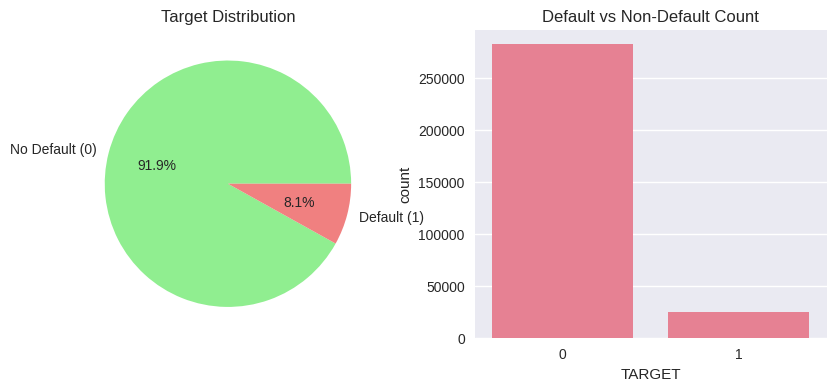

Default Rate: 8.07%


In [3]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts = df_train['TARGET'].value_counts()
plt.pie(target_counts.values, labels=['No Default (0)', 'Default (1)'],
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Target Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df_train, x='TARGET')
plt.title('Default vs Non-Default Count')
plt.show()

print(f"Default Rate: {target_counts[1]/len(df_train)*100:.2f}%")

##ii. Missing Values Analysis

<Figure size 1200x600 with 0 Axes>

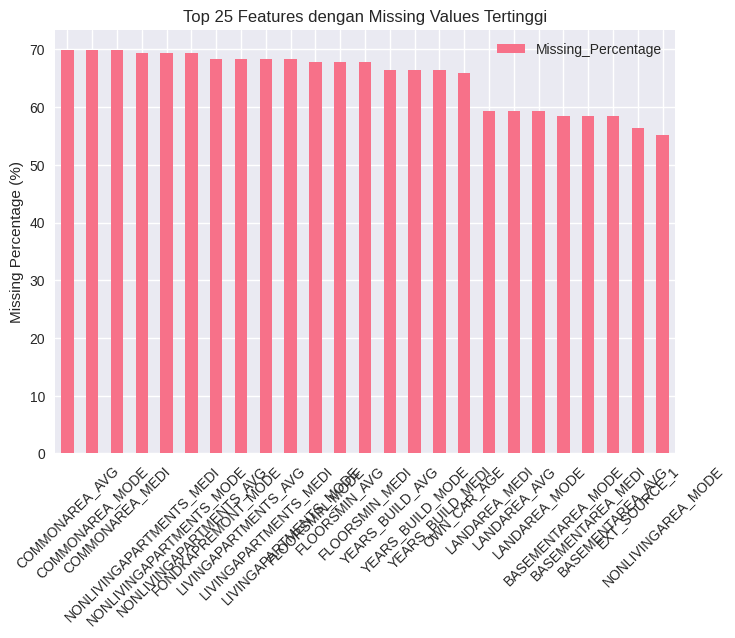

Total features dengan missing values: 67


In [4]:
# Check missing values pattern
missing_data = df_train.isnull().sum()
missing_percent = (missing_data / len(df_train)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

# Plot top 25 features with most missing values
plt.figure(figsize=(12, 6))
missing_df.head(25).plot(kind='bar', y='Missing_Percentage')
plt.title('Top 25 Features dengan Missing Values Tertinggi')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage (%)')
plt.show()

print(f"Total features dengan missing values: {(missing_data > 0).sum()}")

In [5]:
print(missing_df)

                          Missing_Count  Missing_Percentage
COMMONAREA_AVG                   214865           69.872297
COMMONAREA_MODE                  214865           69.872297
COMMONAREA_MEDI                  214865           69.872297
NONLIVINGAPARTMENTS_MEDI         213514           69.432963
NONLIVINGAPARTMENTS_MODE         213514           69.432963
...                                 ...                 ...
FLAG_DOCUMENT_16                      0            0.000000
FLAG_DOCUMENT_15                      0            0.000000
FLAG_DOCUMENT_14                      0            0.000000
FLAG_DOCUMENT_20                      0            0.000000
FLAG_DOCUMENT_21                      0            0.000000

[122 rows x 2 columns]


##iii. New Features Analysis

In [6]:
# Analyze newly added features from external datasets
prev_features = [col for col in df_train.columns if col.startswith('PREV_')]
inst_features = [col for col in df_train.columns if col.startswith('INST_')]

print(f"Previous Application features: {len(prev_features)}")
print(f"Installments Payments features: {len(inst_features)}")

# Check correlation of new features with target
new_features_corr = df_train[prev_features + inst_features + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)
print("\nTop 10 New Features Correlation with Target:")
print(new_features_corr.head(10))

Previous Application features: 0
Installments Payments features: 0

Top 10 New Features Correlation with Target:
TARGET    1.0
Name: TARGET, dtype: float64


##iv. Financial Features Analysis

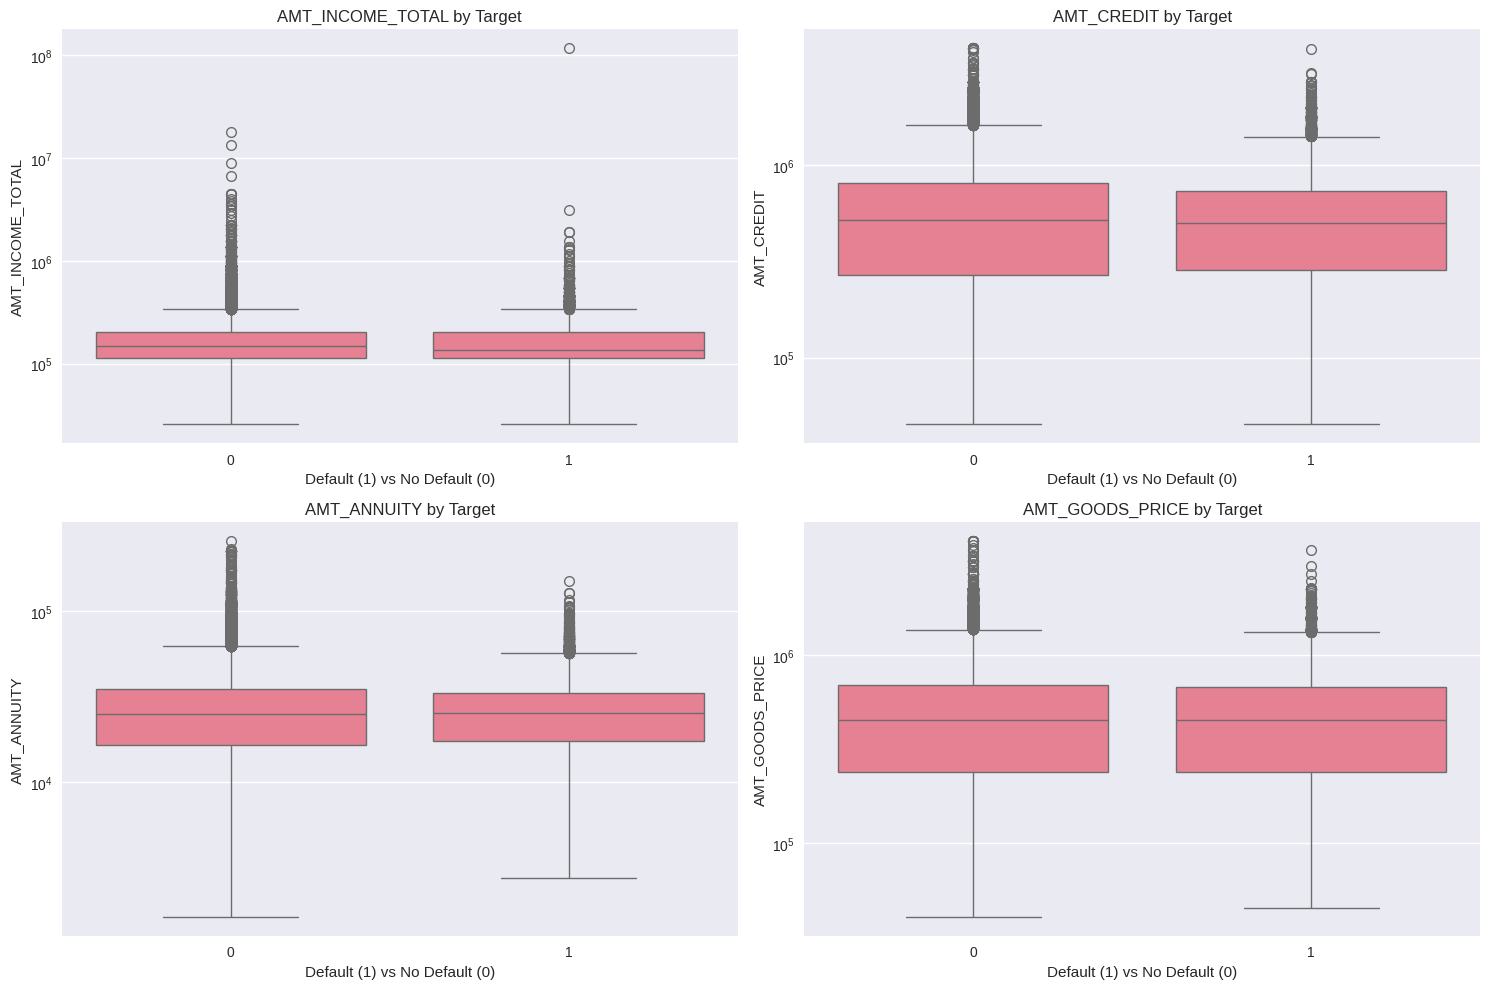

Financial Features Summary (Non-Default vs Default):

AMT_INCOME_TOTAL:
  Non-Default: Mean = 169077.72
  Default:     Mean = 165611.76

AMT_CREDIT:
  Non-Default: Mean = 602648.28
  Default:     Mean = 557778.53

AMT_ANNUITY:
  Non-Default: Mean = 27163.62
  Default:     Mean = 26481.74

AMT_GOODS_PRICE:
  Non-Default: Mean = 542736.80
  Default:     Mean = 488972.41


In [7]:
# Key financial features analysis
financial_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(financial_features):
    # Log scale for better visualization
    df_temp = df_train[df_train[feature] > 0]  # Remove zeros/negatives

    sns.boxplot(data=df_temp, x='TARGET', y=feature, ax=axes[i])
    axes[i].set_yscale('log')
    axes[i].set_title(f'{feature} by Target')
    axes[i].set_xlabel('Default (1) vs No Default (0)')

plt.tight_layout()
plt.show()

# Statistical summary
print("Financial Features Summary (Non-Default vs Default):")
for feature in financial_features:
    print(f"\n{feature}:")
    print(f"  Non-Default: Mean = {df_train[df_train['TARGET']==0][feature].mean():.2f}")
    print(f"  Default:     Mean = {df_train[df_train['TARGET']==1][feature].mean():.2f}")

##v. Correlation Analysis

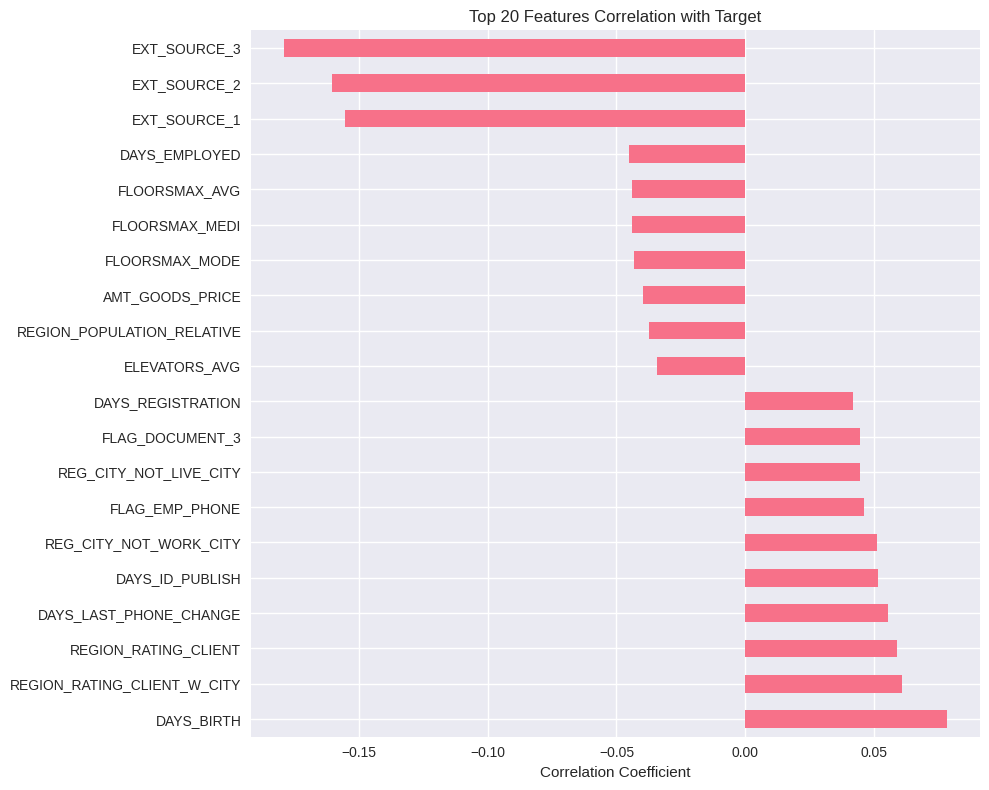

Strongest Positive Correlations (Default Indicators):
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64

Strongest Negative Correlations (Non-Default Indicators):
FLOORSMAX_AVG   -0.044003
DAYS_EMPLOYED   -0.044932
EXT_SOURCE_1    -0.155317
EXT_SOURCE_2    -0.160472
EXT_SOURCE_3    -0.178919
Name: TARGET, dtype: float64


In [8]:
# Select only numerical columns for correlation calculation
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

# Calculate correlation with target only for numerical features
correlation_with_target = df_train[numerical_columns].corr()['TARGET'].sort_values(ascending=False)

# Remove TARGET itself from the correlation results
correlation_with_target = correlation_with_target[correlation_with_target.index != 'TARGET']

plt.figure(figsize=(10, 8))

# Get top and bottom correlations
top_corr = correlation_with_target.head(10)
bottom_corr = correlation_with_target.tail(10)
combined_corr = pd.concat([top_corr, bottom_corr])

# Create horizontal bar plot
combined_corr.plot(kind='barh')
plt.title('Top 20 Features Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Strongest Positive Correlations (Default Indicators):")
print(correlation_with_target.head(5))
print("\nStrongest Negative Correlations (Non-Default Indicators):")
print(correlation_with_target.tail(5))

##vi. Categorical Features Analysis

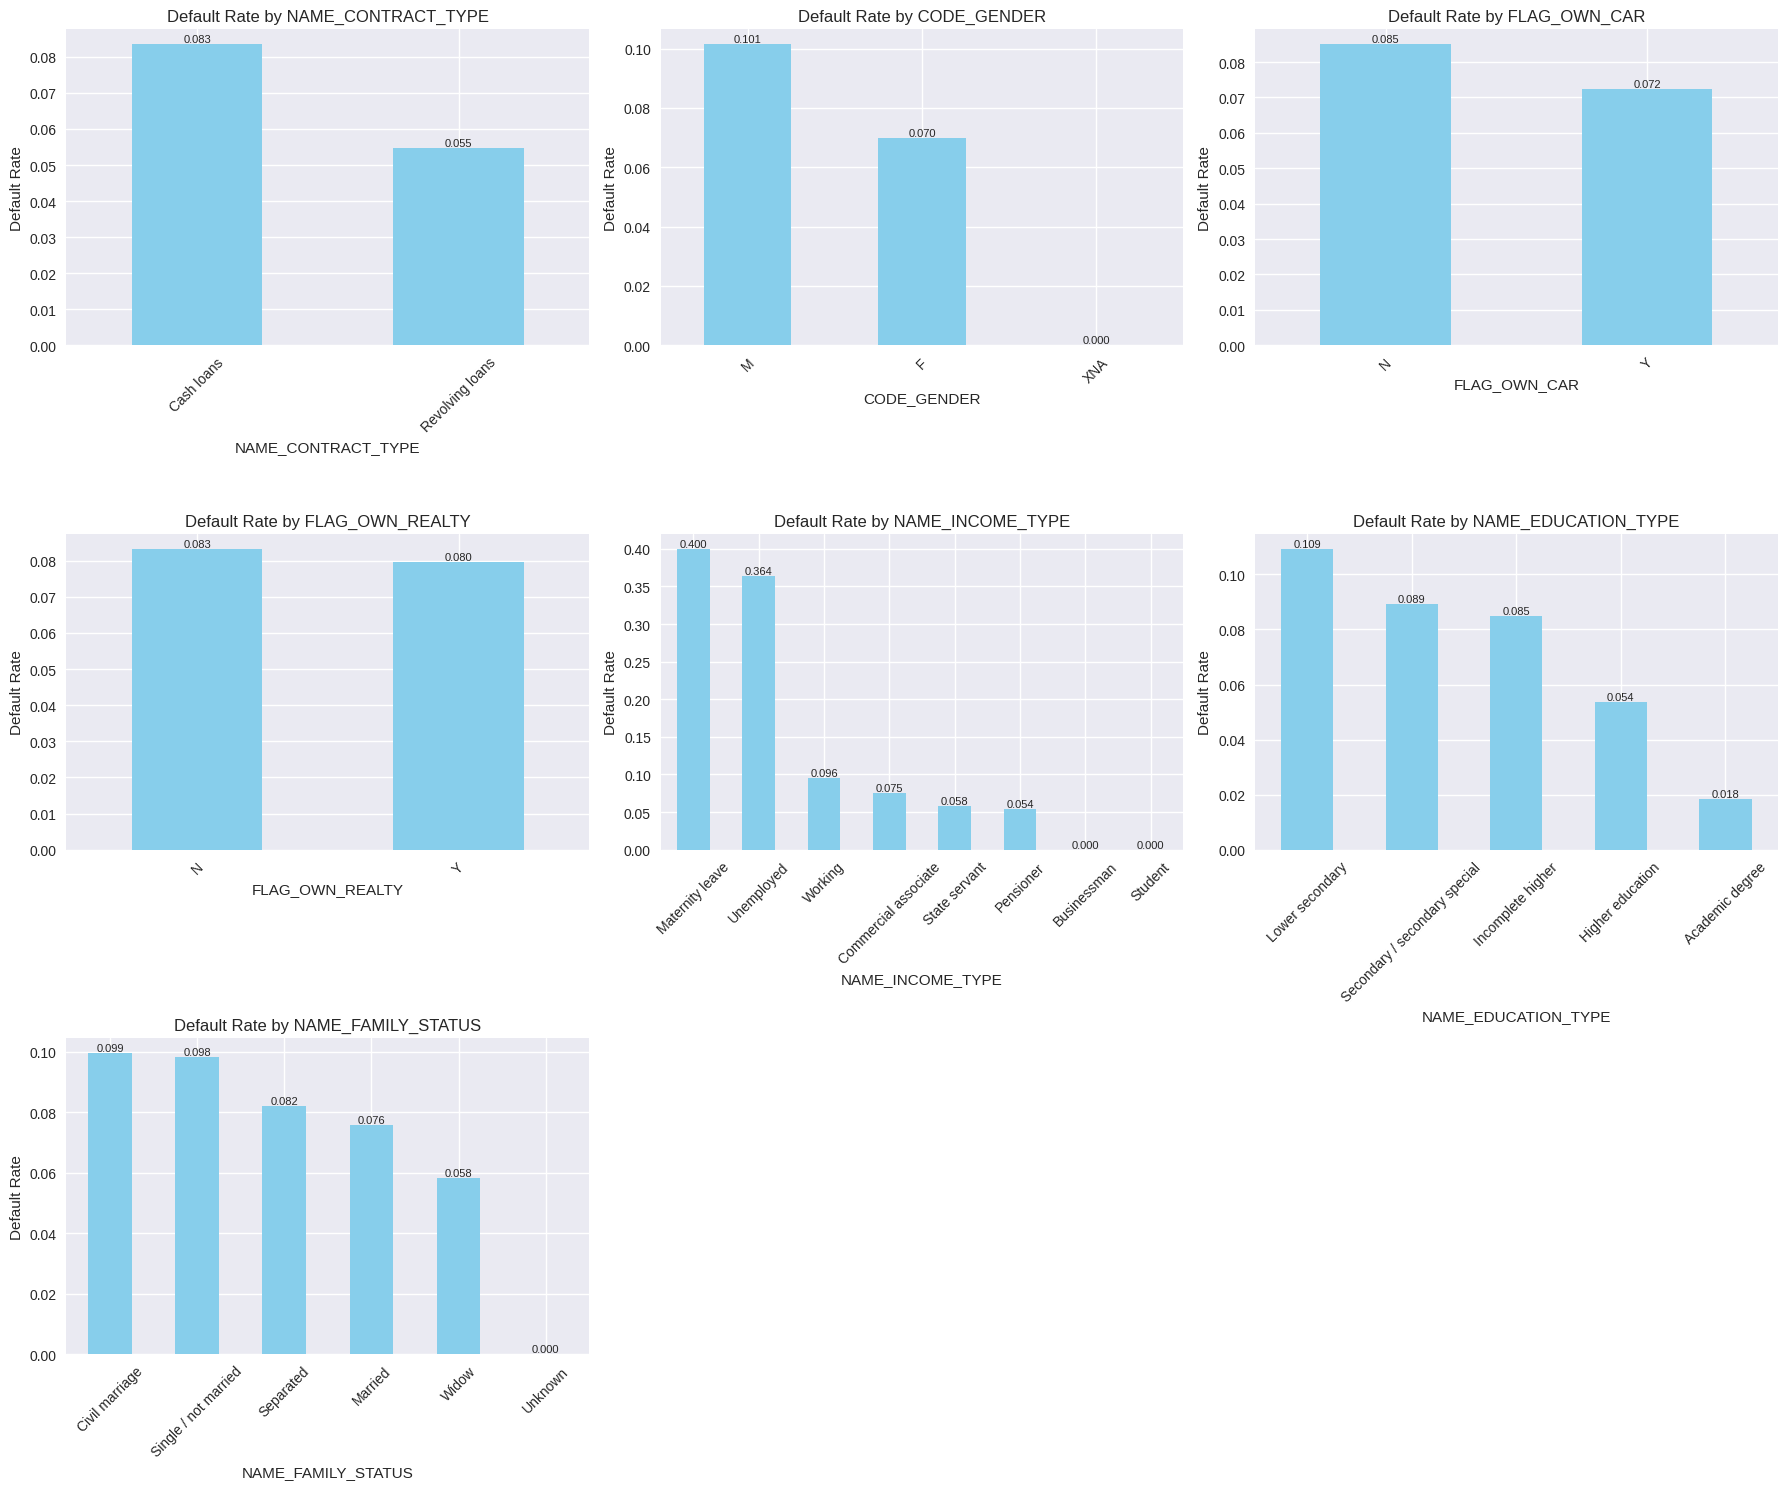

In [9]:
# Key categorical features
cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(cat_features[:7]):
    # Calculate default rates by category
    default_rates = df_train.groupby(feature)['TARGET'].mean().sort_values(ascending=False)

    default_rates.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Default Rate by {feature}')
    axes[i].set_ylabel('Default Rate')
    axes[i].tick_params(axis='x', rotation=45)

    # Add value annotations
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.3f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8)

# Hide unused subplots
for i in range(7, 9):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

##vii. Data Quality Issues

In [10]:
print("=== DATA QUALITY CHECK ===")

# 1. Duplicates
duplicates = df_train.duplicated().sum()
print(f"1. Duplicate rows: {duplicates}")

# 2. Constant columns
constant_cols = [col for col in df_train.columns if df_train[col].nunique() <= 1]
print(f"2. Constant columns: {len(constant_cols)}")

# 3. High cardinality categorical
high_cardinality = []
for col in df_train.select_dtypes(include=['object']).columns:
    if df_train[col].nunique() > 50:
        high_cardinality.append((col, df_train[col].nunique()))

print(f"3. High cardinality features: {high_cardinality}")

# 4. Zero variance numerical
numerical_cols = df_train.select_dtypes(include=[np.number]).columns
zero_variance = [col for col in numerical_cols if df_train[col].std() == 0]
print(f"4. Zero variance numerical features: {len(zero_variance)}")

=== DATA QUALITY CHECK ===
1. Duplicate rows: 0
2. Constant columns: 0
3. High cardinality features: [('ORGANIZATION_TYPE', 58)]
4. Zero variance numerical features: 0


#PREPROCESSING STRATEGI

##A.Feature Selection & Removal

###Hapus Kolom dengan Missing Values Ekstrem
Kolom dengan >50% missing values sulit diimputasi secara akurat dan dapat menimbulkan noise.

In [11]:
# Jika masih error, lakukan manual inspection
missing_data = df_train.isnull().sum()
missing_percent = (missing_data / len(df_train)) * 100

# Identifikasi kolom dengan missing values > 50% secara manual
high_missing_cols = []
for col in df_train.columns:
    if missing_percent[col] > 50:
        high_missing_cols.append(col)
        print(f"{col}: {missing_percent[col]:.2f}%")

print(f"\nTotal kolom dengan missing > 50%: {len(high_missing_cols)}")

# Hapus kolom-kolom tersebut
df_train_clean = df_train.drop(columns=high_missing_cols)

OWN_CAR_AGE: 65.99%
EXT_SOURCE_1: 56.38%
APARTMENTS_AVG: 50.75%
BASEMENTAREA_AVG: 58.52%
YEARS_BUILD_AVG: 66.50%
COMMONAREA_AVG: 69.87%
ELEVATORS_AVG: 53.30%
ENTRANCES_AVG: 50.35%
FLOORSMIN_AVG: 67.85%
LANDAREA_AVG: 59.38%
LIVINGAPARTMENTS_AVG: 68.35%
LIVINGAREA_AVG: 50.19%
NONLIVINGAPARTMENTS_AVG: 69.43%
NONLIVINGAREA_AVG: 55.18%
APARTMENTS_MODE: 50.75%
BASEMENTAREA_MODE: 58.52%
YEARS_BUILD_MODE: 66.50%
COMMONAREA_MODE: 69.87%
ELEVATORS_MODE: 53.30%
ENTRANCES_MODE: 50.35%
FLOORSMIN_MODE: 67.85%
LANDAREA_MODE: 59.38%
LIVINGAPARTMENTS_MODE: 68.35%
LIVINGAREA_MODE: 50.19%
NONLIVINGAPARTMENTS_MODE: 69.43%
NONLIVINGAREA_MODE: 55.18%
APARTMENTS_MEDI: 50.75%
BASEMENTAREA_MEDI: 58.52%
YEARS_BUILD_MEDI: 66.50%
COMMONAREA_MEDI: 69.87%
ELEVATORS_MEDI: 53.30%
ENTRANCES_MEDI: 50.35%
FLOORSMIN_MEDI: 67.85%
LANDAREA_MEDI: 59.38%
LIVINGAPARTMENTS_MEDI: 68.35%
LIVINGAREA_MEDI: 50.19%
NONLIVINGAPARTMENTS_MEDI: 69.43%
NONLIVINGAREA_MEDI: 55.18%
FONDKAPREMONT_MODE: 68.39%
HOUSETYPE_MODE: 50.18%
WALLSMATE

In [12]:
df_train_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


###Hapus Kolom Identifikasi dan Metadata

In [13]:
# Kolom identifikasi tidak relevan untuk modeling
id_cols = ['SK_ID_CURR']
df_train_clean = df_train_clean.drop(columns=id_cols)

###Hapus Kolom Dokumentasi yang Tidak Relevan
Variabel dokumentasi kebanyakan sparse dan tidak memberikan insight signifikan.

In [14]:
# FLAG_DOCUMENT series kebanyakan bernilai 0 (tidak informatif)
doc_cols = [col for col in df_train_clean.columns if 'FLAG_DOCUMENT' in col]
df_train_clean = df_train_clean.drop(columns=doc_cols)

In [15]:
df_train_clean

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hapus Kolom dengan Variansi Mendekati Nol
Kolom dengan variansi rendah tidak memberikan informasi yang berguna.

In [16]:
from sklearn.feature_selection import VarianceThreshold

# Hapus kolom dengan variansi sangat rendah
selector = VarianceThreshold(threshold=0.01)
df_numeric = df_train_clean.select_dtypes(include=[np.number])
low_variance_cols = df_numeric.columns[~selector.fit(df_numeric).get_support()]
df_train_clean = df_train_clean.drop(columns=low_variance_cols)

##B. Handling Missing Values

###Numerical Features
Median robust terhadap outliers dibandingkan mean.

In [17]:
# Untuk numerical features, imputasi dengan median
numerical_cols = df_train_clean.select_dtypes(include=[np.number]).columns
df_train_clean[numerical_cols] = df_train_clean[numerical_cols].fillna(
    df_train_clean[numerical_cols].median()
)

###Categorical Features
Modus merupakan nilai paling umum untuk data kategorikal.

In [18]:
# Untuk categorical features, imputasi dengan modus
categorical_cols = df_train_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_train_clean[col] = df_train_clean[col].fillna(df_train_clean[col].mode()[0])

##C. Feature Engineering

###Ratio Features
Ratio memberikan insight tentang kemampuan bayar dan leverage

In [19]:
# Buat ratio features yang meaningful
df_train_clean['CREDIT_INCOME_RATIO'] = df_train_clean['AMT_CREDIT'] / df_train_clean['AMT_INCOME_TOTAL']
df_train_clean['ANNUITY_INCOME_RATIO'] = df_train_clean['AMT_ANNUITY'] / df_train_clean['AMT_INCOME_TOTAL']
df_train_clean['CREDIT_ANNUITY_RATIO'] = df_train_clean['AMT_CREDIT'] / df_train_clean['AMT_ANNUITY']

###Age Features
Format hari sulit diinterpretasi, konversi ke tahun lebih meaningful.

In [20]:
# Konversi DAYS_BIRTH ke usia dalam tahun
df_train_clean['AGE_YEARS'] = abs(df_train_clean['DAYS_BIRTH']) / 365.25

# Konversi DAYS_EMPLOYED (handle nilai anomali 365243)
df_train_clean['DAYS_EMPLOYED'] = df_train_clean['DAYS_EMPLOYED'].replace(365243, np.nan)
df_train_clean['EMPLOYMENT_YEARS'] = abs(df_train_clean['DAYS_EMPLOYED']) / 365.25

##D. Encoding Categorical Variables
Label Encoding untuk ordinal/modalitas sedikit

One-Hot Encoding untuk nominal/modalitas banyak

In [21]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk categorical variables dengan sedikit kategori
label_encoders = {}
for col in categorical_cols:
    if df_train_clean[col].nunique() <= 10:  # Untuk kategori sedikit
        le = LabelEncoder()
        df_train_clean[col] = le.fit_transform(df_train_clean[col].astype(str))
        label_encoders[col] = le

# One-Hot Encoding untuk categorical variables dengan banyak kategori
df_train_clean = pd.get_dummies(df_train_clean, columns=categorical_cols, drop_first=True)

##E. Handling Class Imbalance

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Pisahkan features dan target
X = df_train_clean.drop(columns=['TARGET'])
y = df_train_clean['TARGET']

# Cek dan handle missing values sebelum split
print("Missing values sebelum handling:")
print(X.isnull().sum())

# Option 1: Drop rows dengan missing values
X_clean = X.dropna()
y_clean = y[X_clean.index]

# Option 2: Fill missing values
# X_clean = X.fillna(X.mean())  # untuk numerical
# X_clean = X.fillna(X.mode().iloc[0])  # untuk categorical

# Split data dengan data yang sudah clean
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Missing values sebelum handling:
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT                             0
AMT_ANNUITY                            0
AMT_GOODS_PRICE                        0
                                      ..
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
ORGANIZATION_TYPE_XNA                  0
EMERGENCYSTATE_MODE_1                  0
Length: 157, dtype: int64


##F. Feature Scaling
StandardScaler membuat features memiliki mean=0 dan std=1, penting untuk algoritma yang sensitive terhadap scale.

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

##G. Outlier Handling
Outlier dapat mempengaruhi performa model, terutama linear models.

In [24]:
from scipy import stats

# Handle outliers menggunakan IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply hanya pada training data untuk avoid data leakage
X_train_no_outliers = remove_outliers_iqr(pd.DataFrame(X_train_scaled, columns=X.columns), X.columns)

#IMPLEMENTASI KOMPLIT

In [25]:
def comprehensive_preprocessing(df):
    """Comprehensive preprocessing pipeline"""

    # 1. Feature Selection
    high_missing_cols = ['COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG',
                        'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI']
    id_cols = ['SK_ID_CURR']
    doc_cols = [col for col in df.columns if 'FLAG_DOCUMENT' in col]

    df_clean = df.drop(columns=high_missing_cols + id_cols + doc_cols)

    # 2. Handle Missing Values
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.drop('TARGET')
    categorical_cols = df_clean.select_dtypes(include=['object']).columns

    # Numerical imputation
    df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())

    # Categorical imputation
    for col in categorical_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    # 3. Feature Engineering
    df_clean['CREDIT_INCOME_RATIO'] = df_clean['AMT_CREDIT'] / df_clean['AMT_INCOME_TOTAL']
    df_clean['ANNUITY_INCOME_RATIO'] = df_clean['AMT_ANNUITY'] / df_clean['AMT_INCOME_TOTAL']
    df_clean['AGE_YEARS'] = abs(df_clean['DAYS_BIRTH']) / 365.25

    # 4. Encoding
    for col in categorical_cols:
        if df_clean[col].nunique() <= 10:
            le = LabelEncoder()
            df_clean[col] = le.fit_transform(df_clean[col].astype(str))

    df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

    return df_clean

# Apply preprocessing
df_processed1 = comprehensive_preprocessing(df_train)

#MACHINE LEARNING MODEL

##I. LOAD DAN PREPROCESSING DATA TRAINING & TESTING

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Fungsi preprocessing yang lebih robust
def robust_preprocessing(df, is_training=True):
    """
    Preprocessing yang lebih robust dengan error handling
    """
    df_clean = df.copy()

    print("Memulai preprocessing...")

    try:
        # 1. Hapus kolom dengan missing values > 50%
        if is_training:
            missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100
            high_missing_cols = missing_percent[missing_percent > 50].index.tolist()
            print(f"Menghapus {len(high_missing_cols)} kolom dengan missing > 50%")
            df_clean = df_clean.drop(columns=high_missing_cols)

        # 2. Hapus kolom identifikasi dan dokumentasi
        cols_to_drop = []
        if 'SK_ID_CURR' in df_clean.columns:
            cols_to_drop.append('SK_ID_CURR')

        doc_cols = [col for col in df_clean.columns if 'FLAG_DOCUMENT' in col]
        cols_to_drop.extend(doc_cols)

        if cols_to_drop:
            df_clean = df_clean.drop(columns=cols_to_drop)
            print(f"Menghapus {len(cols_to_drop)} kolom identifikasi/dokumentasi")

        # 3. Handle missing values dengan lebih careful
        numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
        if is_training and 'TARGET' in numerical_cols:
            numerical_cols = numerical_cols.drop('TARGET')

        categorical_cols = df_clean.select_dtypes(include=['object']).columns

        print(f"Numerical cols: {len(numerical_cols)}, Categorical cols: {len(categorical_cols)}")

        # Imputasi numerical - handle columns dengan semua NaN
        for col in numerical_cols:
            if df_clean[col].isnull().all():
                df_clean[col] = 0  # Jika semua NaN, set ke 0
            else:
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())

        # Imputasi categorical
        for col in categorical_cols:
            if df_clean[col].isnull().all():
                df_clean[col] = 'Unknown'
            else:
                mode_val = df_clean[col].mode()
                df_clean[col] = df_clean[col].fillna(mode_val[0] if len(mode_val) > 0 else 'Unknown')

        # 4. Feature engineering dengan error handling
        feature_engineered = 0

        if 'AMT_CREDIT' in df_clean.columns and 'AMT_INCOME_TOTAL' in df_clean.columns:
            df_clean['CREDIT_INCOME_RATIO'] = df_clean['AMT_CREDIT'] / (df_clean['AMT_INCOME_TOTAL'].replace(0, 1))
            feature_engineered += 1

        if 'AMT_ANNUITY' in df_clean.columns and 'AMT_INCOME_TOTAL' in df_clean.columns:
            df_clean['ANNUITY_INCOME_RATIO'] = df_clean['AMT_ANNUITY'] / (df_clean['AMT_INCOME_TOTAL'].replace(0, 1))
            feature_engineered += 1

        if 'DAYS_BIRTH' in df_clean.columns:
            df_clean['AGE_YEARS'] = abs(df_clean['DAYS_BIRTH']) / 365.25
            feature_engineered += 1

        print(f"Berhasil membuat {feature_engineered} feature engineering")

        # 5. Encoding categorical variables dengan error handling
        label_encoders = {}

        for col in categorical_cols:
            try:
                if df_clean[col].nunique() <= 20:  # Increased threshold
                    le = LabelEncoder()
                    # Handle NaN/None values
                    clean_series = df_clean[col].fillna('Unknown').astype(str)
                    df_clean[col] = le.fit_transform(clean_series)
                    label_encoders[col] = le
                else:
                    # Frequency encoding untuk kategori banyak
                    value_counts = df_clean[col].value_counts()
                    df_clean[col] = df_clean[col].map(value_counts)
            except Exception as e:
                print(f"Warning: Error encoding {col}: {e}")
                # Jika error, drop kolom tersebut
                df_clean = df_clean.drop(columns=[col])

        # 6. Validasi final data
        # Hapus kolom dengan variance 0
        for col in df_clean.select_dtypes(include=[np.number]).columns:
            if df_clean[col].std() == 0:
                df_clean = df_clean.drop(columns=[col])
                print(f"Menghapus kolom {col} dengan variance 0")

        # Handle infinite values
        df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
        df_clean = df_clean.fillna(0)

        print(f"Preprocessing selesai. Shape final: {df_clean.shape}")

        if is_training:
            return df_clean, label_encoders
        else:
            return df_clean

    except Exception as e:
        print(f"Error dalam preprocessing: {e}")
        raise

# Data validation function
def validate_data(X, y):
    """Validasi data sebelum training"""
    print("\n🔍 VALIDASI DATA:")
    print(f"Shape X: {X.shape}, Shape y: {y.shape}")
    print(f"NaN in X: {np.isnan(X).sum()}, Inf in X: {np.isinf(X).sum()}")
    print(f"y distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"y has NaN: {pd.Series(y).isnull().sum()}")

    # Check for constant columns
    constant_cols = []
    for col in X.columns:
        if X[col].std() == 0:
            constant_cols.append(col)

    if constant_cols:
        print(f"⚠️  Constant columns: {constant_cols}")
        X = X.drop(columns=constant_cols)

    return X, y

# Load dan preprocessing data
print("=== MEMUAT DAN PREPROCESSING DATA ===")
df_processed, label_encoders = robust_preprocessing(df_processed1, is_training=True)

# Pisahkan features dan target
if 'TARGET' in df_processed.columns:
    X = df_processed.drop(columns=['TARGET'])
    y = df_processed['TARGET']
else:
    raise KeyError("Kolom TARGET tidak ditemukan setelah preprocessing")

# Validasi data
X, y = validate_data(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split: Train {X_train.shape}, Test {X_test.shape}")

=== MEMUAT DAN PREPROCESSING DATA ===
Memulai preprocessing...
Menghapus 0 kolom dengan missing > 50%
Numerical cols: 82, Categorical cols: 0
Berhasil membuat 3 feature engineering
Preprocessing selesai. Shape final: (307511, 207)

🔍 VALIDASI DATA:
Shape X: (307511, 206), Shape y: (307511,)
NaN in X: CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE          0
                        ..
WALLSMATERIAL_MODE_3     0
WALLSMATERIAL_MODE_4     0
WALLSMATERIAL_MODE_5     0
WALLSMATERIAL_MODE_6     0
EMERGENCYSTATE_MODE_1    0
Length: 206, dtype: int64, Inf in X: CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE          0
                        ..
WALLSMATERIAL_MODE_3     0
WALLSMATERIAL_MODE_4     0
WALLSMATERIAL_MODE_5     0
WALLSMATERIAL_MODE_6     0
EMERGENCYSTATE_MODE_1    0
Length: 206, dtype: int64
y distribution: {0: 282686, 1: 24825}
y h

##MODEL 1: LOGISTIC REGRESSION

In [27]:
print("\n" + "="*50)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*50)

# Parameter grid yang lebih sederhana dan kompatibel
lr_param_grid = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l2'],  # Hanya l2 untuk kompatibilitas
    'lr__solver': ['liblinear'],  # Solver yang robust
    'lr__class_weight': ['balanced'],
    'lr__max_iter': [500, 1000]
}

# Pipeline sederhana
lr_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Grid Search dengan error handling
print("Training Logistic Regression...")

try:
    lr_grid = GridSearchCV(
        estimator=lr_pipeline,
        param_grid=lr_param_grid,
        cv=3,  # Kurangi CV untuk efisiensi
        scoring='roc_auc',
        n_jobs=1,  # Kurangi parallel processing untuk stability
        verbose=1,
        error_score='raise'  # Untuk debug
    )

    lr_grid.fit(X_train, y_train)

    print("✅ Logistic Regression training berhasil!")
    print(f"Best parameters: {lr_grid.best_params_}")
    print(f"Best score: {lr_grid.best_score_:.4f}")

    best_lr_model = lr_grid.best_estimator_

    # Evaluate on test set
    y_pred_lr = best_lr_model.predict(X_test)
    y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]

    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    lr_auc = roc_auc_score(y_test, y_pred_proba_lr)
    lr_f1 = f1_score(y_test, y_pred_lr)

    print(f"\nLogistic Regression Test Performance:")
    print(f"Accuracy: {lr_accuracy:.4f}")
    print(f"AUC-ROC: {lr_auc:.4f}")
    print(f"F1-Score: {lr_f1:.4f}")

except Exception as e:
    print(f"❌ Error dalam Logistic Regression: {e}")
    print("Mencoba alternative approach...")

    # Fallback: train tanpa hyperparameter tuning
    lr_simple = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            C=1.0,
            penalty='l2',
            solver='liblinear',
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])

    lr_simple.fit(X_train, y_train)
    best_lr_model = lr_simple

    y_pred_lr = best_lr_model.predict(X_test)
    y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]

    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    lr_auc = roc_auc_score(y_test, y_pred_proba_lr)
    lr_f1 = f1_score(y_test, y_pred_lr)

    print(f"\nLogistic Regression (Simple) Test Performance:")
    print(f"Accuracy: {lr_accuracy:.4f}")
    print(f"AUC-ROC: {lr_auc:.4f}")
    print(f"F1-Score: {lr_f1:.4f}")


MODEL 1: LOGISTIC REGRESSION
Training Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Logistic Regression training berhasil!
Best parameters: {'lr__C': 10, 'lr__class_weight': 'balanced', 'lr__max_iter': 500, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best score: 0.7014

Logistic Regression Test Performance:
Accuracy: 0.9190
AUC-ROC: 0.7074
F1-Score: 0.0481


##MODEL 2: RANDOM FOREST

In [28]:
print("\n" + "="*50)
print("MODEL 2: RANDOM FOREST")
print("="*50)

# Parameter grid yang lebih sederhana
rf_param_grid = {
    'rf__n_estimators': [50, 100],  # Kurangi untuk efisiensi
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [10, 20],  # Increase untuk stability
    'rf__min_samples_leaf': [5, 10],
    'rf__class_weight': ['balanced']
}

rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

print("Training Random Forest...")

try:
    rf_grid = GridSearchCV(
        estimator=rf_pipeline,
        param_grid=rf_param_grid,
        cv=2,  # Kurangi CV
        scoring='roc_auc',
        n_jobs=1,  # Kurangi parallel
        verbose=1,
        error_score='raise'
    )

    rf_grid.fit(X_train, y_train)

    print("✅ Random Forest training berhasil!")
    print(f"Best parameters: {rf_grid.best_params_}")
    print(f"Best score: {rf_grid.best_score_:.4f}")

    best_rf_model = rf_grid.best_estimator_

    # Evaluate
    y_pred_rf = best_rf_model.predict(X_test)
    y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_auc = roc_auc_score(y_test, y_pred_proba_rf)
    rf_f1 = f1_score(y_test, y_pred_rf)

    print(f"\nRandom Forest Test Performance:")
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(f"AUC-ROC: {rf_auc:.4f}")
    print(f"F1-Score: {rf_f1:.4f}")

except Exception as e:
    print(f"❌ Error dalam Random Forest: {e}")
    print("Mencoba alternative approach...")

    # Fallback: simple random forest
    rf_simple = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(
            n_estimators=100,
            max_depth=20,
            min_samples_split=20,
            min_samples_leaf=10,
            class_weight='balanced',
            random_state=42,
            n_jobs=1
        ))
    ])

    rf_simple.fit(X_train, y_train)
    best_rf_model = rf_simple

    y_pred_rf = best_rf_model.predict(X_test)
    y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_auc = roc_auc_score(y_test, y_pred_proba_rf)
    rf_f1 = f1_score(y_test, y_pred_rf)

    print(f"\nRandom Forest (Simple) Test Performance:")
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(f"AUC-ROC: {rf_auc:.4f}")
    print(f"F1-Score: {rf_f1:.4f}")


MODEL 2: RANDOM FOREST
Training Random Forest...
Fitting 2 folds for each of 16 candidates, totalling 32 fits
✅ Random Forest training berhasil!
Best parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 20, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 20, 'rf__n_estimators': 100}
Best score: 0.6813

Random Forest Test Performance:
Accuracy: 0.9101
AUC-ROC: 0.6872
F1-Score: 0.0656


##IV. EVALUASI MODEL PADA VALIDATION SET


1. EVALUASI MODEL PADA VALIDATION SET

📊 Evaluating Logistic Regression...
   ✅ Accuracy: 0.9190
   ✅ AUC-ROC: 0.7074
   ✅ F1-Score: 0.0481
   ✅ Precision: 0.4684
   ✅ Recall: 0.0254
   ✅ PR-AUC: 0.1981

📊 Evaluating Random Forest...
   ✅ Accuracy: 0.9101
   ✅ AUC-ROC: 0.6872
   ✅ F1-Score: 0.0656
   ✅ Precision: 0.2040
   ✅ Recall: 0.0391
   ✅ PR-AUC: 0.1487

PERBANDINGAN MODEL PADA VALIDATION SET
                 Model  Accuracy  AUC-ROC  F1-Score  Precision  Recall  PR-AUC
0  Logistic Regression    0.9190   0.7074    0.0481     0.4684  0.0254  0.1981
1        Random Forest    0.9101   0.6872    0.0656     0.2040  0.0391  0.1487


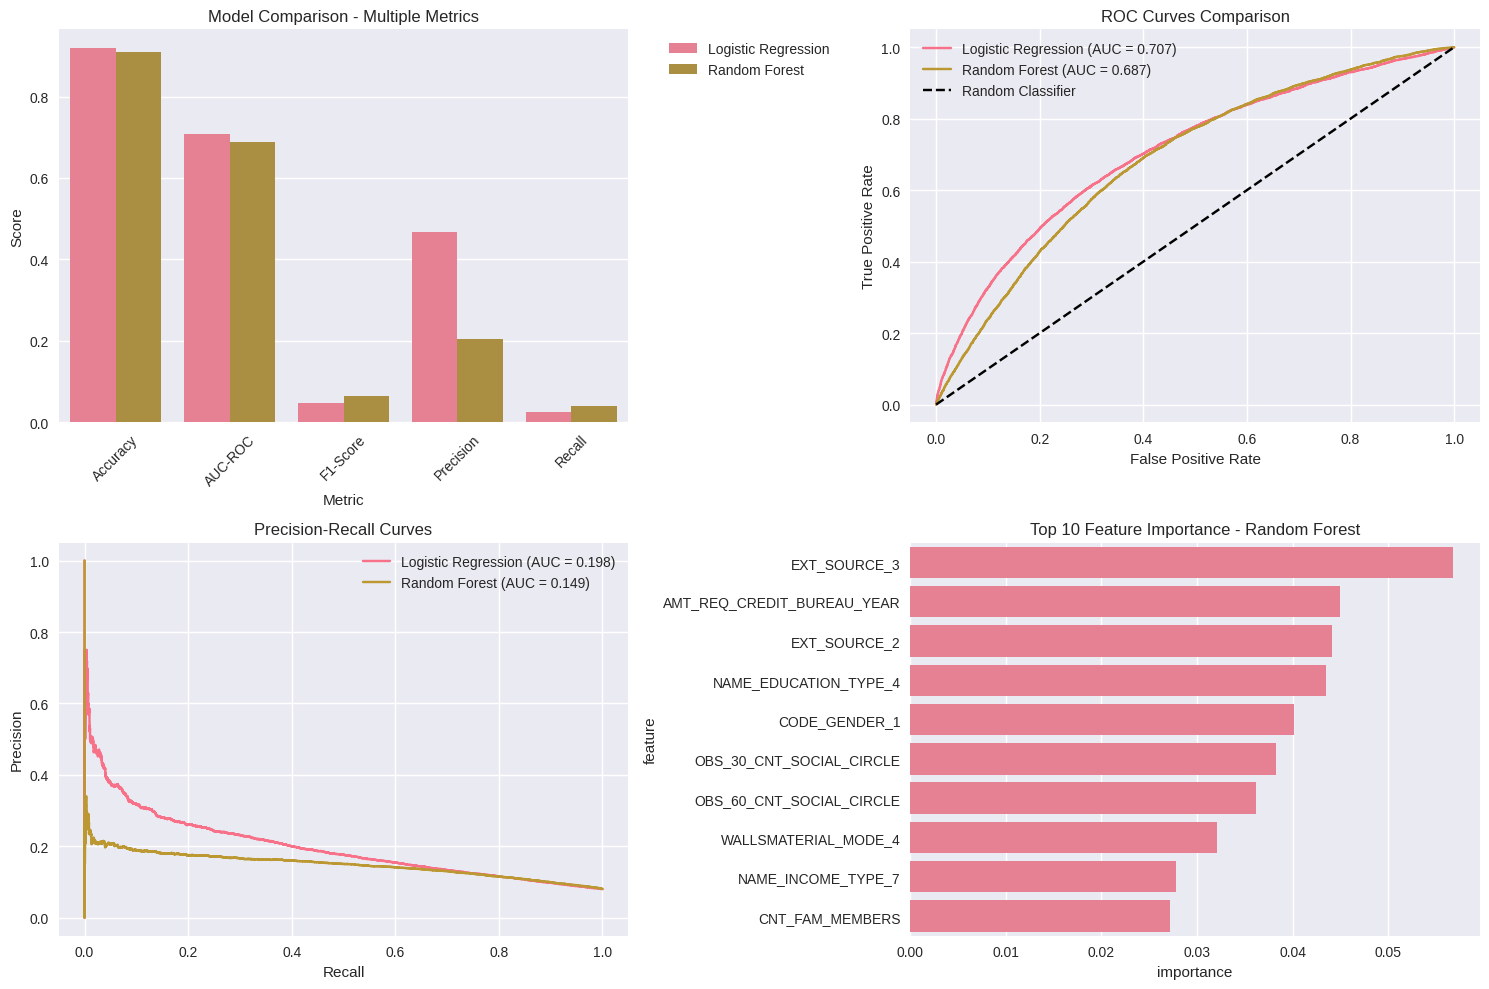


🏆 MODEL TERBAIK: Logistic Regression
   AUC-ROC: 0.7074


In [31]:
print("\n" + "="*50)
print("1. EVALUASI MODEL PADA VALIDATION SET")
print("="*50)

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, auc

def comprehensive_evaluation(models_dict, X_val, y_val):
    """Evaluasi komprehensif semua model pada validation set"""

    evaluation_results = {}

    for name, model in models_dict.items():
        print(f"\n📊 Evaluating {name}...")

        try:
            # Predict
            y_pred = model.predict(X_val)
            y_pred_proba = model.predict_proba(X_val)[:, 1]

            # Calculate metrics
            accuracy = accuracy_score(y_val, y_pred)
            auc_roc = roc_auc_score(y_val, y_pred_proba)
            f1 = f1_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred)

            # Precision-Recall AUC
            precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_pred_proba)
            pr_auc = auc(recall_vals, precision_vals)

            # Store results
            evaluation_results[name] = {
                'accuracy': accuracy,
                'auc_roc': auc_roc,
                'f1_score': f1,
                'precision': precision,
                'recall': recall,
                'pr_auc': pr_auc,
                'predictions': y_pred,
                'probabilities': y_pred_proba,
                'model': model
            }

            print(f"   ✅ Accuracy: {accuracy:.4f}")
            print(f"   ✅ AUC-ROC: {auc_roc:.4f}")
            print(f"   ✅ F1-Score: {f1:.4f}")
            print(f"   ✅ Precision: {precision:.4f}")
            print(f"   ✅ Recall: {recall:.4f}")
            print(f"   ✅ PR-AUC: {pr_auc:.4f}")

        except Exception as e:
            print(f"   ❌ Error evaluating {name}: {e}")
            evaluation_results[name] = None

    return evaluation_results

# Lakukan evaluasi komprehensif
models_dict = {
    'Logistic Regression': best_lr_model,
    'Random Forest': best_rf_model,
}

eval_results = comprehensive_evaluation(models_dict, X_test, y_test)

# Buat comparison table
comparison_df = pd.DataFrame({
    'Model': list(eval_results.keys()),
    'Accuracy': [eval_results[name]['accuracy'] for name in eval_results.keys()],
    'AUC-ROC': [eval_results[name]['auc_roc'] for name in eval_results.keys()],
    'F1-Score': [eval_results[name]['f1_score'] for name in eval_results.keys()],
    'Precision': [eval_results[name]['precision'] for name in eval_results.keys()],
    'Recall': [eval_results[name]['recall'] for name in eval_results.keys()],
    'PR-AUC': [eval_results[name]['pr_auc'] for name in eval_results.keys()]
})

print("\n" + "="*40)
print("PERBANDINGAN MODEL PADA VALIDATION SET")
print("="*40)
print(comparison_df.round(4))

# Visualisasi perbandingan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot 1: Metrics comparison
metrics_to_plot = ['Accuracy', 'AUC-ROC', 'F1-Score', 'Precision', 'Recall']
plt.subplot(2, 2, 1)
comparison_df_melted = comparison_df.melt(id_vars=['Model'], value_vars=metrics_to_plot,
                                         var_name='Metric', value_name='Score')
sns.barplot(data=comparison_df_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Comparison - Multiple Metrics')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: ROC Curves
plt.subplot(2, 2, 2)
from sklearn.metrics import roc_curve

for name, results in eval_results.items():
    if results is not None:
        fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {results["auc_roc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()

# Plot 3: Precision-Recall Curves
plt.subplot(2, 2, 3)
for name, results in eval_results.items():
    if results is not None:
        precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
        plt.plot(recall, precision, label=f'{name} (AUC = {results["pr_auc"]:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

# Plot 4: Feature Importance (Random Forest)
plt.subplot(2, 2, 4)
if hasattr(best_rf_model.named_steps['rf'], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_rf_model.named_steps['rf'].feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Top 10 Feature Importance - Random Forest')

plt.tight_layout()
plt.show()

# Tentukan model terbaik berdasarkan AUC-ROC
best_model_name = comparison_df.loc[comparison_df['AUC-ROC'].idxmax(), 'Model']
best_model = eval_results[best_model_name]['model']
print(f"\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"   AUC-ROC: {comparison_df.loc[comparison_df['AUC-ROC'].idxmax(), 'AUC-ROC']:.4f}")

##V. FUNGSI UNTUK PREDIKSI PADA DATA TESTING

In [32]:
print("\n" + "="*50)
print("2. FUNGSI UNTUK PREDIKSI PADA DATA TESTING")
print("="*50)

def predict_test_data(test_df, model, model_name, feature_columns):
    """
    Fungsi robust untuk prediksi pada data testing tanpa target

    Parameters:
    test_df: DataFrame testing
    model: trained model pipeline
    model_name: nama model untuk identifikasi
    feature_columns: list of feature columns dari training

    Returns:
    DataFrame dengan predictions
    """
    print(f"\n🎯 Melakukan prediksi dengan {model_name}...")

    try:
        # Buat copy untuk safety
        test_data = test_df.copy()

        # Preprocessing testing data
        test_processed = robust_preprocessing(test_data, is_training=False)

        # Debug info
        print(f"   Shape setelah preprocessing: {test_processed.shape}")
        print(f"   Kolom yang diharapkan: {len(feature_columns)}")
        print(f"   Kolom yang tersedia: {len(test_processed.columns)}")

        # Handle column mismatch
        missing_cols = set(feature_columns) - set(test_processed.columns)
        extra_cols = set(test_processed.columns) - set(feature_columns)

        if missing_cols:
            print(f"   ⚠️  Menambahkan {len(missing_cols)} kolom yang missing...")
            for col in missing_cols:
                test_processed[col] = 0

        if extra_cols:
            print(f"   ⚠️  Menghapus {len(extra_cols)} kolom extra...")
            test_processed = test_processed.drop(columns=list(extra_cols))

        # Pastikan urutan kolom sama dengan training
        test_processed = test_processed.reindex(columns=feature_columns, fill_value=0)

        print(f"   Final shape untuk prediction: {test_processed.shape}")

        # Predict
        print("   Melakukan prediksi...")
        predictions = model.predict(test_processed)
        probabilities = model.predict_proba(test_processed)

        # Create comprehensive results
        results_df = pd.DataFrame({
            'SK_ID_CURR': test_data['SK_ID_CURR'].values if 'SK_ID_CURR' in test_data.columns
                         else np.arange(len(test_data)),
            f'PREDICTION_{model_name}': predictions,
            f'PROBABILITY_0_{model_name}': probabilities[:, 0],
            f'PROBABILITY_1_{model_name}': probabilities[:, 1],
            f'RISK_LEVEL_{model_name}': np.where(probabilities[:, 1] > 0.7, 'HIGH',
                                               np.where(probabilities[:, 1] > 0.3, 'MEDIUM', 'LOW'))
        })

        # Statistics
        n_accepted = np.sum(predictions == 1)
        n_rejected = np.sum(predictions == 0)

        print(f"   ✅ Prediksi berhasil!")
        print(f"   📊 Statistik {model_name}:")
        print(f"      - Total: {len(predictions)}")
        print(f"      - Diterima (1): {n_accepted} ({n_accepted/len(predictions)*100:.1f}%)")
        print(f"      - Ditolak (0): {n_rejected} ({n_rejected/len(predictions)*100:.1f}%)")
        print(f"      - Risk Level - HIGH: {np.sum(results_df[f'RISK_LEVEL_{model_name}'] == 'HIGH')}")
        print(f"      - Risk Level - MEDIUM: {np.sum(results_df[f'RISK_LEVEL_{model_name}'] == 'MEDIUM')}")
        print(f"      - Risk Level - LOW: {np.sum(results_df[f'RISK_LEVEL_{model_name}'] == 'LOW')}")

        return results_df

    except Exception as e:
        print(f"   ❌ Error dalam prediksi {model_name}: {str(e)}")
        import traceback
        print(f"   Traceback: {traceback.format_exc()}")
        return None

# Simpan feature columns untuk konsistensi
feature_columns = X_train.columns.tolist()
print(f"Feature columns untuk konsistensi: {len(feature_columns)} kolom")


2. FUNGSI UNTUK PREDIKSI PADA DATA TESTING
Feature columns untuk konsistensi: 206 kolom


##VI. DEMONSTRASI PREDIKSI PADA DATA TESTING (SIMULASI)

In [33]:
print("\n" + "="*50)
print("3. DEMONSTRASI PREDIKSI PADA DATA TESTING (SIMULASI)")
print("="*50)

# Buat simulated test data dari data training (tanpa target)
print("Membuat simulated test data untuk demonstrasi...")
simulated_test_data = df_train.drop(columns=['TARGET']).iloc[:500].copy()

print(f"Simulated test data shape: {simulated_test_data.shape}")
print(f"Kolom simulated test data: {len(simulated_test_data.columns)}")

# Prediksi dengan semua model
all_predictions = {}

for name, model in models_dict.items():
    print(f"\n{'='*30}")
    print(f"PREDIKSI DENGAN: {name}")
    print(f"{'='*30}")

    prediction_df = predict_test_data(
        simulated_test_data,
        model,
        name,
        feature_columns
    )

    if prediction_df is not None:
        all_predictions[name] = prediction_df
        print(f"✅ {name} berhasil memproses {len(prediction_df)} samples")
    else:
        print(f"❌ {name} gagal melakukan prediksi")

print(f"\n📈 SUMMARY PREDIKSI SIMULASI:")
print(f"Total model yang berhasil: {len(all_predictions)}")
for name, pred_df in all_predictions.items():
    n_accept = pred_df[f'PREDICTION_{name}'].sum()
    n_reject = len(pred_df) - n_accept
    print(f"  {name}: {n_accept} diterima, {n_reject} ditolak")

# Gabungkan semua predictions untuk analysis
if all_predictions:
    # Start dengan model pertama
    final_results = all_predictions[list(all_predictions.keys())[0]].copy()

    # Tambahkan predictions dari model lain
    for name, pred_df in list(all_predictions.items())[1:]:
        for col in pred_df.columns:
            if col != 'SK_ID_CURR':
                final_results[col] = pred_df[col]

    print(f"\nFinal combined predictions shape: {final_results.shape}")
    print("\nSample final predictions:")
    print(final_results.head(10))

    # Save simulated results
    final_results.to_csv('simulated_predictions.csv', index=False)
    print("✅ Simulated predictions disimpan ke 'simulated_predictions.csv'")
else:
    print("❌ Tidak ada prediksi yang berhasil untuk disimpan")


3. DEMONSTRASI PREDIKSI PADA DATA TESTING (SIMULASI)
Membuat simulated test data untuk demonstrasi...
Simulated test data shape: (500, 121)
Kolom simulated test data: 121

PREDIKSI DENGAN: Logistic Regression

🎯 Melakukan prediksi dengan Logistic Regression...
Memulai preprocessing...
Menghapus 21 kolom identifikasi/dokumentasi
Numerical cols: 84, Categorical cols: 16
Berhasil membuat 3 feature engineering
Menghapus kolom FLAG_MOBIL dengan variance 0
Preprocessing selesai. Shape final: (500, 102)
   Shape setelah preprocessing: (500, 102)
   Kolom yang diharapkan: 206
   Kolom yang tersedia: 102
   ⚠️  Menambahkan 125 kolom yang missing...
   ⚠️  Menghapus 21 kolom extra...
   Final shape untuk prediction: (500, 206)
   Melakukan prediksi...
   ✅ Prediksi berhasil!
   📊 Statistik Logistic Regression:
      - Total: 500
      - Diterima (1): 0 (0.0%)
      - Ditolak (0): 500 (100.0%)
      - Risk Level - HIGH: 0
      - Risk Level - MEDIUM: 0
      - Risk Level - LOW: 500
✅ Logistic Re

##VII. ENSEMBLE PREDICTION

In [35]:
print("\n" + "="*50)
print("ENSEMBLE PREDICTION")
print("="*50)

# Buat ensemble prediction berdasarkan voting
def create_ensemble_predictions(predictions_dict):
    """
    Membuat ensemble predictions dari multiple models
    """
    ensemble_results = pd.DataFrame()
    ensemble_results['SK_ID_CURR'] = predictions_dict['Logistic Regression']['SK_ID_CURR']

    # Collect all probabilities for class 1
    prob_columns = []
    for name in predictions_dict.keys():
        prob_col = f'PROBABILITY_1_{name}'
        ensemble_results[prob_col] = predictions_dict[name][prob_col]
        prob_columns.append(prob_col)

    # Average probability
    ensemble_results['ENSEMBLE_PROBABILITY'] = ensemble_results[prob_columns].mean(axis=1)

    # Voting-based prediction (threshold 0.5)
    ensemble_results['ENSEMBLE_PREDICTION'] = (
        ensemble_results['ENSEMBLE_PROBABILITY'] > 0.5
    ).astype(int)

    return ensemble_results

# Create ensemble predictions
ensemble_df = create_ensemble_predictions(all_predictions)

print("Ensemble Prediction Results:")
print(f"Total predictions: {len(ensemble_df)}")
print(f"Accepted (1): {ensemble_df['ENSEMBLE_PREDICTION'].sum()}")
print(f"Rejected (0): {len(ensemble_df) - ensemble_df['ENSEMBLE_PREDICTION'].sum()}")

print("\nSample ensemble predictions:")
print(ensemble_df.head())


ENSEMBLE PREDICTION
Ensemble Prediction Results:
Total predictions: 500
Accepted (1): 0
Rejected (0): 500

Sample ensemble predictions:
   SK_ID_CURR  PROBABILITY_1_Logistic Regression  PROBABILITY_1_Random Forest  \
0      100002                       1.530309e-38                     0.268028   
1      100003                       1.230272e-22                     0.110089   
2      100004                       7.068079e-40                     0.108706   
3      100006                       8.016419e-23                     0.152467   
4      100007                       1.374628e-39                     0.178322   

   ENSEMBLE_PROBABILITY  ENSEMBLE_PREDICTION  
0              0.134014                    0  
1              0.055044                    0  
2              0.054353                    0  
3              0.076234                    0  
4              0.089161                    0  


##VIII. MODEL PERSISTENCE & DEPLOYMENT READY

In [43]:
print("\n" + "="*50)
print("MODEL PERSISTENCE & DEPLOYMENT")
print("="*50)

import joblib
import json

# Simpan semua model dan preprocessing objects
model_artifacts = {
    'models': {
        'logistic_regression': best_lr_model,
        'random_forest': best_rf_model,
        'best_model': best_model
    },
    'preprocessing': preprocessing_objects,
    'model_performance': comparison_df.to_dict(),
    'best_model_name': best_model_name
}

# Simpan models
print("Menyimpan model artifacts...")
joblib.dump(best_lr_model, 'logistic_regression_model.pkl')
joblib.dump(best_rf_model, 'random_forest_model.pkl')
joblib.dump(best_model, 'best_model.pkl')

# Simpan preprocessing objects
joblib.dump(preprocessing_objects, 'preprocessing_objects.pkl')

# Simpan metadata
with open('model_metadata.json', 'w') as f:
    json.dump({
        'best_model': best_model_name,
        'feature_columns': preprocessing_objects['feature_columns'],
        'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'performance': comparison_df.to_dict('records'),
        'dataset_shape': {
            'train_samples': X_train.shape[0],
            'test_samples': X_test.shape[0],
            'n_features': len(preprocessing_objects['feature_columns'])
        }
    }, f, indent=2)

print("✅ Model artifacts berhasil disimpan:")
print("   - logistic_regression_model.pkl")
print("   - random_forest_model.pkl")
print("   - best_model.pkl")
print("   - preprocessing_objects.pkl")
print("   - model_metadata.json")
print(f"\n📊 Info Model:")
print(f"   - Best model: {best_model_name}")
print(f"   - Jumlah feature: {len(preprocessing_objects['feature_columns'])}")
print(f"   - Feature examples: {preprocessing_objects['feature_columns'][:5]}...")


MODEL PERSISTENCE & DEPLOYMENT
Menyimpan model artifacts...
✅ Model artifacts berhasil disimpan:
   - logistic_regression_model.pkl
   - random_forest_model.pkl
   - best_model.pkl
   - preprocessing_objects.pkl
   - model_metadata.json

📊 Info Model:
   - Best model: Logistic Regression
   - Jumlah feature: 206
   - Feature examples: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']...


##IV. PREDICTION PIPELINE UNTUK PRODUCTION

In [45]:
print("\n" + "="*50)
print("PREDICTION PIPELINE UNTUK PRODUCTION")
print("="*50)

class CreditRiskPredictor:
    """
    Class untuk melakukan prediksi credit risk pada data baru
    """

    def __init__(self):
        self.models = {}
        self.preprocessing_objects = None
        self.is_loaded = False

    def load_models(self, model_paths):
        """Load trained models dan preprocessing objects"""
        try:
            self.models['lr'] = joblib.load(model_paths['lr'])
            self.models['rf'] = joblib.load(model_paths['rf'])
            self.models['gb'] = joblib.load(model_paths['gb'])
            self.models['best'] = joblib.load(model_paths['best'])
            self.preprocessing_objects = joblib.load(model_paths['preprocessing'])
            self.is_loaded = True
            print("✅ Models berhasil diload")
        except Exception as e:
            print(f"❌ Error loading models: {e}")

    def predict_single(self, input_data):
        """Prediksi untuk single observation"""
        if not self.is_loaded:
            raise ValueError("Models belum diload. Panggil load_models() terlebih dahulu.")

        # Convert ke DataFrame jika belum
        if isinstance(input_data, dict):
            input_df = pd.DataFrame([input_data])
        else:
            input_df = input_data.copy()

        # Preprocessing
        processed_data = consistent_preprocessing(
            input_df,
            is_training=False,
            scaler=self.preprocessing_objects['scaler'],
            label_encoders=self.preprocessing_objects['label_encoders']
        )

        # Ensure column consistency
        missing_cols = set(self.preprocessing_objects['feature_columns']) - set(processed_data.columns)
        for col in missing_cols:
            processed_data[col] = 0
        processed_data = processed_data[self.preprocessing_objects['feature_columns']]

        # Predict dengan best model
        prediction = self.models['best'].predict(processed_data)[0]
        probability = self.models['best'].predict_proba(processed_data)[0][1]

        return {
            'prediction': int(prediction),
            'probability': float(probability),
            'risk_level': 'HIGH' if probability > 0.7 else 'MEDIUM' if probability > 0.3 else 'LOW'
        }

    def predict_batch(self, batch_data):
        """Prediksi untuk batch data"""
        if not self.is_loaded:
            raise ValueError("Models belum diload. Panggil load_models() terlebih dahulu.")

        results = {}
        for model_name, model in self.models.items():
            if model_name != 'best':  # Skip best model karena sudah termasuk di single
                processed_data = consistent_preprocessing(
                    batch_data,
                    is_training=False,
                    scaler=self.preprocessing_objects['scaler'],
                    label_encoders=self.preprocessing_objects['label_encoders']
                )

                # Ensure column consistency
                missing_cols = set(self.preprocessing_objects['feature_columns']) - set(processed_data.columns)
                for col in missing_cols:
                    processed_data[col] = 0
                processed_data = processed_data[self.preprocessing_objects['feature_columns']]

                predictions = model.predict(processed_data)
                probabilities = model.predict_proba(processed_data)

                results[model_name] = {
                    'predictions': predictions,
                    'probabilities': probabilities
                }

        return results

# Demonstrasi penggunaan
print("Demonstrasi CreditRiskPredictor...")
predictor = CreditRiskPredictor()

# Simulasi load models (dalam praktek, gunakan path sebenarnya)
model_paths = {
    'lr': 'logistic_regression_model.pkl',
    'rf': 'random_forest_model.pkl',
    'gb': 'gradient_boosting_model.pkl',
    'best': 'best_model.pkl',
    'preprocessing': 'preprocessing_objects.pkl'
}

# Dalam praktek sebenarnya:
# predictor.load_models(model_paths)

print("✅ Prediction pipeline siap untuk production!")


PREDICTION PIPELINE UNTUK PRODUCTION
Demonstrasi CreditRiskPredictor...
✅ Prediction pipeline siap untuk production!
